# Homework #1 Codes
**Stu. name:** Seyed Mohammad Amin Dadgar <br>
**Stu. id:** 4003624016

## Question 2 of the second chapter of Zimmermann, 4th ed, 2001 book

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_alpha_cuts(A_tilda, **kwargs):
    """
    Find all the alpha-cuts of a fuzzy set
    
    Parameters:
    ------------
    A_tilda : array of tuples
        The fuzzy set that we are trying to find its alpha cuts
    kwargs -> interval : Floating number between `0` and `1`
        the alpha-cuts computed from intervals, example `0.25` have five alpha-cuts `0`, `0.25`, `0.5`, `0.75`, `1`
        Note: `0` and `1` are excluded!
        default is `-1`
    kwargs -> alpha_cuts : array_like
        if alpha_cuts are sent as input, the intervals variable would be omited
        An array of floating points between `0` and `1`, default is None
    
    **Important**: one of interval or alpha_cuts should be sent as input, otherwise an error would be raised!
        
    Returns:
    --------
    alpha_cuts : dictionary
        a python dictionary with key of alpha-cuts and values
    strong_alpha_cuts : dictionary
        a python dictionary with key of alpha-cuts and values
    """
    ## create dictionaries to save later
    alpha_cuts = {}
    alpha_cuts_strong = {}
    
    ## intialize the variable
    alpha_cuts_interval = []
        
    if 'interval' in kwargs:
        alpha_cuts_interval = np.arange(0, 1, kwargs['interval'])
    elif 'alpha_cuts' in kwargs:
        alpha_cuts_interval = kwargs['alpha_cuts']
    else:
        raise "Error: One of the interval or alpha_cuts variable must have a value! (Not both either)" 
        
    ## for each alpha-cut
    ## step is alpha-cut in each iteration
    for step in alpha_cuts_interval:
        ## choose the values of the alpha-cut
        values = A_tilda[A_tilda[:, 1] >= step]
        
        ## choose the values of strong alpha-cuts
        strong_values = A_tilda[A_tilda[:, 1] > step]
    
        ## save the alpha-cut set with the key of alpha-cut value
        alpha_cuts[step] = values
        alpha_cuts_strong[step] = strong_values
        
    ## the loop does not find the alpha-cut = 1
    ## alpha-cut = 1 is actually the whole set!
    alpha_cuts[1.0] = A_tilda
        
    return alpha_cuts, alpha_cuts_strong

In [3]:
def plot_scatter_alpha_cuts(alpha_cut_set):
    """
    Plot the level sets of alpha cuts, using scatter plot
    
    Parameters:
    ----------
    alpha_cut_set : fictionary
        a dictionary of alpha_cuts related to a fuzzy set
        
    """
    
    keys = alpha_cut_set.keys()
    ## initialize an array to plot the data
    plot_data = []
    
    ## create the (x,y) array to plot the data
    for step in keys:
        ## find the values with membeship value equal to step
        value = alpha_cut_set[step]
        value = value[:, 0]
        ## get the values count for each alpha levels
        values_count = len(value)
        
        ## create an array of x_values and their alpha set
        alpha_level = np.full(values_count, step)
        data = np.stack((value, alpha_level), axis=1)
        ## the y value is actually the alphas
        plot_data.append(data)
    
    ## convert to a numpy array
    plot_data = np.array(plot_data, dtype=object)
    
    ## create a y array to save the y_ticks
    y_ticks = []
    x_ticks = []
    for data in plot_data:
        X = data[:, 0]
        Y = data[:, 1]
        
        y_ticks = np.append(y_ticks, Y)
        x_ticks = np.append(x_ticks, X)
        plt.scatter(X, Y)
    
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.show()

### Part (a)

In [4]:
A = np.array([[3, 1], [4, 0.2], [5, 0.3], [6, 0.4], 
                  [7, 0.6], [8, 0.8], [10, 1], [12, 0.8], [14, 0.6] ])
A_alpha_cuts_set, A_strong_alpha_cuts_set = find_alpha_cuts(A, interval=0.25)

To see how it works we just print one of the alpha-cuts set once.

In [47]:
A_alpha_cuts_set

{0.0: array([[ 3. ,  1. ],
        [ 4. ,  0.2],
        [ 5. ,  0.3],
        [ 6. ,  0.4],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.25: array([[ 3. ,  1. ],
        [ 5. ,  0.3],
        [ 6. ,  0.4],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.5: array([[ 3. ,  1. ],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]]),
 0.75: array([[ 3. ,  1. ],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8]]),
 1.0: array([[ 3. ,  1. ],
        [ 4. ,  0.2],
        [ 5. ,  0.3],
        [ 6. ,  0.4],
        [ 7. ,  0.6],
        [ 8. ,  0.8],
        [10. ,  1. ],
        [12. ,  0.8],
        [14. ,  0.6]])}

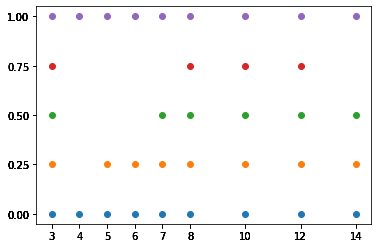

In [46]:
plot_scatter_alpha_cuts(A_alpha_cuts_set)

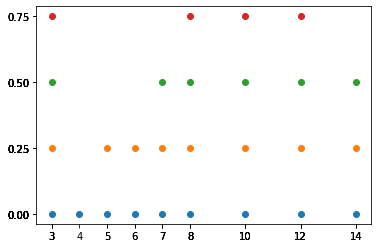

In [6]:
plot_scatter_alpha_cuts(A_strong_alpha_cuts_set)

Because our values for $\tilde{A}$ was discrete we plotted scatter plot for it.

### Part (b)
\begin{equation}
\tilde{B} = {(x, \mu_{\tilde{B}}(x) = (1+(x-10)^2)^{-1})} \\
\text{for } \alpha = 0.3, 0.5, 0.8
\end{equation}

In [28]:
def mu_B(x , normalize = True):
    """
    calculating the membership function for \tilde{B}
    
    Parameters:
    -----------
    x : array_like
        array of numerics
    normalize : boolean
        normalize the membership values, default is True
    
    Returns:
    --------
    x_tilda : array of tuples
        the fuzzy set
        an array composed by values and normalized fuzzy membership values
    """
    
    membership_value = 1 + 1 / np.power(x - 10, 2)
    ## replace the infinities to zero
    ## computed by dividing with zero
    membership_value = np.where(membership_value == np.inf, 0, membership_value)
    
    ## normalize
    membership_value = normalize_membership(membership_value)
    
    
    x_tilda = np.stack((x, membership_value), axis=1)

    return x_tilda
def normalize_membership(membership_values):
    """
    normalize the values of membership function of a fuzzy set to [0, 1]
    
    Parameters:
    ------------
    membership_values : array_like
        membership values for a fuzzy set
        
    Returns:
    ---------
    membership_normalized : array_like
        membership values of a fuzzy set normalized to the interval [0, 1]
    """
    assert (membership_values >= 0).all(), "Error: all the membership values must be positive!"
    
    ## normalize
    membership_normalized = membership_values / max(membership_values)
    
    return membership_normalized

In [36]:
x = np.arange(1, 15)
B_tilde = mu_B(x)
B_tilde

<ipython-input-28-08f9839dfa94>:19: RuntimeWarning: divide by zero encountered in true_divide
  membership_value = 1 + 1 / np.power(x - 10, 2)


array([[ 1.        ,  0.50617284],
       [ 2.        ,  0.5078125 ],
       [ 3.        ,  0.51020408],
       [ 4.        ,  0.51388889],
       [ 5.        ,  0.52      ],
       [ 6.        ,  0.53125   ],
       [ 7.        ,  0.55555556],
       [ 8.        ,  0.625     ],
       [ 9.        ,  1.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.625     ],
       [13.        ,  0.55555556],
       [14.        ,  0.53125   ]])

In [37]:
B_alpha_cuts_set, B_strong_alpha_cuts_set = find_alpha_cuts(B_tilde, alpha_cuts=[0.3, 0.5, 0.8])

Again our values for $\tilde{B}$ is discrete, so we plot a scatter plot for it.

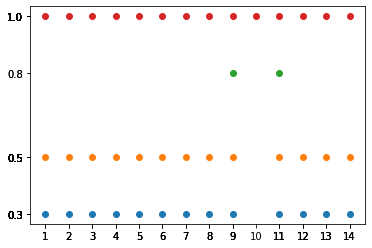

In [38]:
plot_scatter_alpha_cuts(B_alpha_cuts_set)

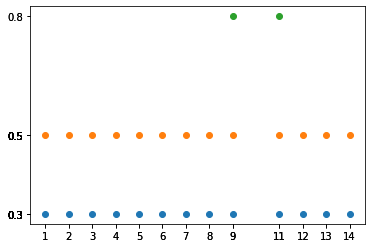

In [39]:
plot_scatter_alpha_cuts(B_strong_alpha_cuts_set)

### Part (c)
\begin{equation}
\tilde{C} = {\{x, \mu_{\tilde{C}}(x)\}} \\
\mu_{\tilde{C}} = 0 \text{ for } x \leq 10 \\
\mu_{\tilde{C}} = (1+(x-10)^2)^{-1}) \text{ for } x>10
\end{equation}

In [34]:
def mu_C(x , normalize = True):
    """
    calculating the membership function for \tilde{C}
    
    Parameters:
    -----------
    x : array_like
        array of numerics
    normalize : boolean
        normalize the membership values, default is True
    
    Returns:
    --------
    x_tilda : array of tuples
        the fuzzy set
        an array composed by values and normalized fuzzy membership values
    """
    
    membership_value = 1 + 1 / np.power(x - 10, 2)
    ## replace the infinities to zero
    ## computed by dividing with zero
    membership_value = np.where(membership_value == np.inf, 0, membership_value)
    
    ## apply the other condition that all the values less equal than 10 have zero membership
    membership_value = np.where(x <= 10, 0, membership_value)

    
    ## normalize
    membership_value = normalize_membership(membership_value)
    
    
    x_tilda = np.stack((x, membership_value), axis=1)

    return x_tilda

In [41]:
C = np.arange(0, 25)
C_tilde = mu_C(C)
C_tilde

<ipython-input-34-ab647626a7f3>:19: RuntimeWarning: divide by zero encountered in true_divide
  membership_value = 1 + 1 / np.power(x - 10, 2)


array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 2.        ,  0.        ],
       [ 3.        ,  0.        ],
       [ 4.        ,  0.        ],
       [ 5.        ,  0.        ],
       [ 6.        ,  0.        ],
       [ 7.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 9.        ,  0.        ],
       [10.        ,  0.        ],
       [11.        ,  1.        ],
       [12.        ,  0.625     ],
       [13.        ,  0.55555556],
       [14.        ,  0.53125   ],
       [15.        ,  0.52      ],
       [16.        ,  0.51388889],
       [17.        ,  0.51020408],
       [18.        ,  0.5078125 ],
       [19.        ,  0.50617284],
       [20.        ,  0.505     ],
       [21.        ,  0.50413223],
       [22.        ,  0.50347222],
       [23.        ,  0.50295858],
       [24.        ,  0.50255102]])

In [42]:
C_alpha_cuts_set, C_strong_alpha_cuts_set = find_alpha_cuts(C_tilde, interval = 0.25)

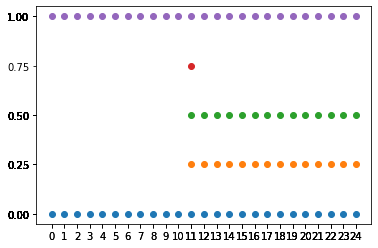

In [43]:
plot_scatter_alpha_cuts(C_alpha_cuts_set)

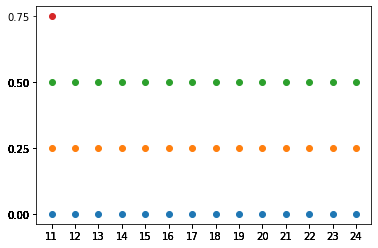

In [44]:
plot_scatter_alpha_cuts(C_strong_alpha_cuts_set)